Algoritmo de Punto Fijo
============

- Me permite encontrar un valor de $𝑥$ en el intervalo $[𝑎,𝑏]$ tal que $𝑔(𝑥)=𝑥$. Se dice que este valor, si es que existe, es un **_punto fijo_** de la función $𝑔$.

**Algoritmo**  

> i. Tomar como aproximación inicial para $x^0$ el valor $a$ (o $b$).  

> ii. Si $g(a) \le a$ o si ambos valores difieren en una cantidad mayor al error con que se desea encontrar $x^0$ (**_tolerancia_** $\rightarrow \epsilon$), se toma como nueva aproximación el valor $g(a)$ (o $g(b)$), al que anotamos como $x_1$.

> iii. Si $\vert x_1-a\vert > \epsilon$, se toma como nueva aproximación el valor $g(x_1)$, al que anotamos como $x_2$.

> iv. Seguir iterando $x_k=g(x_k)$ hasta que $\vert x_k-x_{k-1}\vert < \epsilon$.  
>Alternativamente la tolerancia puede elegirse como cota para el error relativo $\vert \frac{x_k-x_{k-1}}{x_k}\vert< \epsilon$.

- La iteración de punto fijo **_converge_** cuando se cumple que $\vert g(u)-g(v)\vert \le c \vert u-v\vert$ para dos valores arbitrarios $u,v \in [a,b]$. Una función con esta propiedad se dice que es una **_contracción_**.

> i. $E_k=\vert x_k-x^0\vert=\vert g(x_{k-1})-g(x^0)\vert \le c\vert x_{k-1}-x^0\vert=cE_{k-1}\Rightarrow$ La convergencia es **_lineal_**, pero la rapidez dependerá del valor de $c$  

> ii. Si $g'(x^0)=0$ el desarrollo de Taylor de $g$ en torno a $x^0$ resulta $g(x_{k-1})=g(x^0)+\frac{1}{2} g''(x^0)(x_{k-1}-x^0)^2+\frac{1}{6} g''(\zeta)(x_{k-1}-x^0)^3$. En este caso particular la convergencia del método es **_cuadrática_** 

\begin{eqnarray}
E_k&=&\vert x_k-x^0\vert=\vert g(x_{k-1})-g(x^0)\vert \\
&\le& \frac{1}{2} \left(\vert g''(x^0)\vert+\frac{1}{6} \vert g''(\zeta)\vert\vert(x_{k-1}-x^0)\vert\right)\vert x_{k-1}-x^0\vert^2=\frac{1}{2} \left(\vert g''(x^0)\vert+\Delta\right)E_{k-1}^2 
\end{eqnarray}

**Teorema de existencia y unicidad**

> i. Si $g$ es una función continua en el intervalo $[a,b]$ cuya imagen está comprendida en dicho intervalo ( $a<g(x)<b~\forall x \in [a,b]$) $\Rightarrow$ $g$ tiene un punto fijo en $[a,b]$.

> ii. Si además $g$ es derivable en $(a,b)$ y se cumple que $\vert g'(x)\vert \le c <1~\forall x \in [a,b]$ $\Rightarrow$ $g$ tiene un **_único_** punto fijo en $[a,b]$.

- Alternativamente el algoritmo de punto fijo puede utilizarse para **_encontrar raíces_** de una función. 

> i. Si $\exists x^0\in[a,b]$ tal que $f(x^0)=0$ $\Rightarrow x^0$ es un punto fijo de la función $g(x)=f(x)-x$.

> ii. Si $\exists x^0\in[a,b]$ tal que $g(x^0)=x^0$ $\Rightarrow x^0$ es raíz de la función $f(x)$.

**Problema a resolver:** Encontrar una raíz de la función $f(x)=x^3+4x^2-10$ en el intervalo $[1,2]$.

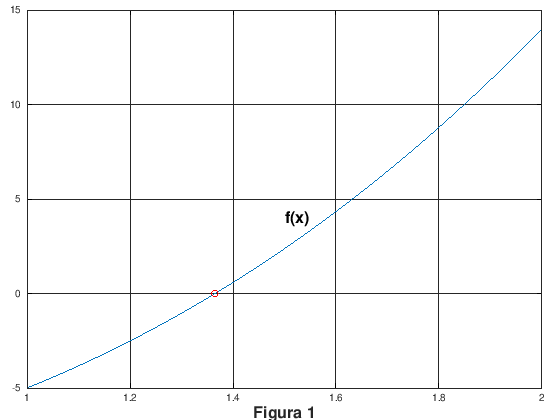

In [14]:
f=@(t) t.^3+4*t.^2-10;
t = 1:0.01:2;
plot(t,f(t),1.365,0,'or')
grid on
xlabel('Figura 1','FontSize',16,'FontWeight','bold')
text(1.5,4,'f(x)','FontSize',16,'FontWeight','bold')

**Resolución**:  
1. Lo primero que debemos hacer es pasar del problema de búsqueda de raíces a un problema de punto fijo. Por ejemplo, la ecuación $0=x^3+4x^2-10$ es equivalente a $x=x-x^3-4x^2+10$, y por lo tanto, para encontrar raíces de $f$ en $[1,2]$ podemos buscar los puntos fijos de $g_1(x)=x-x^3-4x^2+10$. Ahora se está en condiciones de iniciar el algoritmo de búsqueda...

In [5]:
% Algoritmo de punto fijo
% Resuelve numériicamente x = g(x), mediante iteración de punto fijo, comenzando por el valor a
%
g=@(x) x-x^3-4*x^2+10; a=1; % inputs: g,a = función y valor inicial del punto fijo
TolX=10^-4;                  % TolX = cota superior para la diferencia |x(n + 1) - x(n)|
MaxIter=50;                  % MaxIter = máximo número de iteraciones
%
% Empieza el algoritmo
xx(1)=a;
k=1;
err(1)=g(a)-a;
if abs(err(1)/a)>TolX
  for k=2:MaxIter
    xx(k)=g(xx(k-1));              % xx = historia de x
    err(k)=xx(k)-xx(k-1);          % err = |x(k) - x(k - 1)| 
     if abs(err(k)/xx(k)) < TolX, 
       break;                      % si el error relativo es menor a la tolerancia elegida termina el bucle, si no sigue     
     endif                         % hasta que alcanza el número máximo de iteraciones MaxIter        
  endfor
endif
%
format long
  x=xx(k)                         %x = valor de la aproximación alcanzada por el algoritmo
%
if k==MaxIter
fprintf('Mejor aproximación luedo de %d iteraciones\n',MaxIter)
endif

x = NaN
Mejor aproximación luedo de 50 iteraciones


- Podemos ver que en este ejemplo, luego de completar el número máximo de iteraciones, el algoritmo no encuentra ninguna estimación para el valor $x^0$, ni buena ni mala, ya que diverge. Esto se desprende del resultado x=NaN (por sus siglas en inglés Not a Number).  

- Para entender un poco mejor que está pasando miremos los datos de 'Tabla', que corresponden a las primeras iteraciones del algoritmo.  
>En la columna 1, se indica el número de iteración, $k$; en la columna 2, la cota del error en la estimación de $x^0$ para la iteración k-ésima, $E_k$; en la columna 3, el valor estimado en la iteración k-ésima, $x_k$; y en la columna 4, el valor de la función $f$ evaluada en la aproximación $x_k$ 

In [6]:
f=@(x) x.^3+4*x.^2-10;
format short;
Tabla=[[1:6]',err(1:6)',xx(1:6)',f(xx(1:6))']  % Tabla

Tabla =

    1.0000e+00    5.0000e+00    1.0000e+00   -5.0000e+00
    2.0000e+00    5.0000e+00    6.0000e+00    3.5000e+02
    3.0000e+00   -3.5000e+02   -3.4400e+02   -4.0234e+07
    4.0000e+00    4.0234e+07    4.0234e+07    6.5129e+22
    5.0000e+00   -6.5129e+22   -6.5129e+22   -2.7627e+68
    6.0000e+00    2.7627e+68    2.7627e+68   2.1086e+205



>Se puede ver que el error crece con cada iteración en vez de disminuir. A su vez los valores estimados de $x^0$ rápidamente se van del intervalo $[1,2]$ donde se quiere encontrar el punto fijo de $g$, y el valor de $f$ en cada una de estas estimaciones se aparta cada vez más de ser 0.  
>¿Entonces $g(x)$ tiene un punto fijo en $[1,2]$? La respuesta es que sí lo tiene, como se observa en la Figura 2 y como se podía inferir de la Figura 1, donde se observa que $f$ tiene una raíz en $[1,2]$. Sin embargo el algoritmo de punto fijo no converge dado a que $g$ no es una contracción en $[1,2]$.

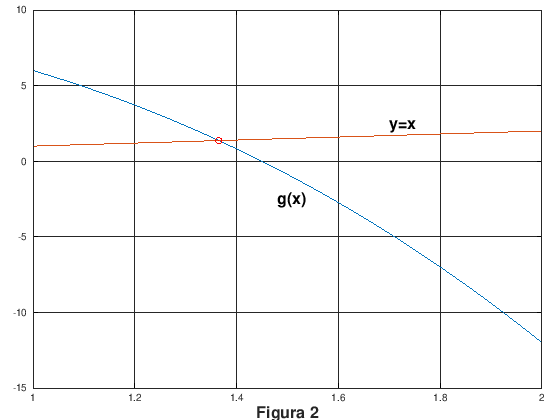

In [15]:
g=@(t) t-t.^3-4*t.^2+10;
t = 1:0.01:2;
plot(t,g(t),t,t,1.365,1.365,'or')
grid on
xlabel('Figura 2','FontSize',16,'FontWeight','bold')
text(1.48,-2.5,'g(x)','FontSize',16,'FontWeight','bold')
text(1.7,2.5,'y=x','FontSize',16,'FontWeight','bold')

Pero la función $g_1$ no es la única opción...  
2. Mostrar que las siguientes son formas alternativas de expresar el problema $f(x)=0$ como un problema de punto fijo 
> $g_2(x)=\left(\frac{10}{x}-4x\right)^{1/2}$     $~~~~~~~~~~g_3(x)=\frac{1}{2}\left(10-x^3\right)^{1/2}$  
> $g_4(x)=\left(\frac{10}{4+x}\right)^{1/2}$      $~~~~~~~~~~~~~~~~~g_5(x)=x-\frac{x^3+4x^2-10}{3x^2+8x}$


3. Ahora podemos volver a ''probar suerte'' con el algoritmo de punto fijo utilizando las funciones anteriores. Sin embargo, en vez de probar con la suerte podemos intentar analizar cada una de estas funciones para decidir *a priori* cuál será más conveniente.
  - En el caso de la función $g_2$, esta se vuelve indefinida en $[1,2]$ ya que el argumento de la raíz cuadrada se vuelve negativo para $x>\sqrt{\frac{5}{2}}$ (Fig. 3).  
  - El algoritmo de punto fijo converge al usar cualquiera de las funciones $g_3, g_4$ o $g_5$, pero la velocidad de convergencia es diferente en cada caso. En particular, en el intervalo $[1.25,1.51]$ se tiene que $\vert g_3'(x)\vert<\vert g_4'(x)\vert<\vert g_5'(x)\vert$ (Fig. 4).

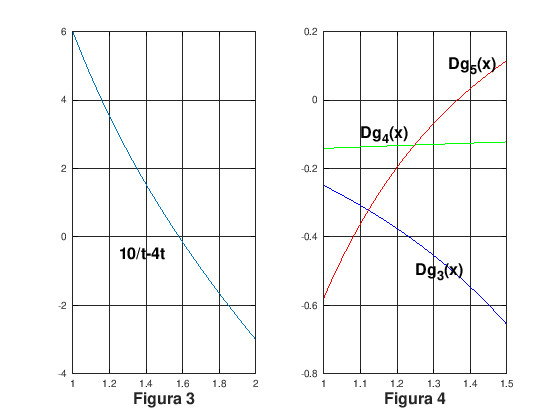

In [27]:
arg=@(t) 10./t-4*t; 
Dg3=@(t) (-0.75*t.^2).*(10-t.^3).^(-1/2);                     % Derivadas de la funciones g3, g4 y g5
Dg4=@(t) -((2.5)^(1/2))*(1./(4+t)).^(3/2);
Dg5=@(t) ((8+6*t).*(-10+4*t.^2+t.^3))./(8*t+3*t.^2).^2;
t1 = 1:0.01:2;
t= 1:0.01:1.5;
subplot(1,2,1)
plot(t1,arg(t1))
grid on                                                       % Diguja una grilla sobre el gráfico   
text(1.25,-0.5,'10/t-4t','FontSize',16,'FontWeight','bold')
xlabel('Figura 3','FontSize',16,'FontWeight','bold')          % Incerta texto al eje x 
subplot(1,2,2)
plot(t,Dg3(t),'b',t,Dg4(t),'g',t,Dg5(t),'r')
grid on                                                       % Diguja una grilla sobre el gráfico   
text(1.25,-0.5,'Dg_3(x)','FontSize',16,'FontWeight','bold')
text(1.1,-0.1,'Dg_4(x)','FontSize',16,'FontWeight','bold')   % Incerta texto sobre el gráfico en la posición (x,y) indicada
text(1.34,0.1,'Dg_5(x)','FontSize',16,'FontWeight','bold')
xlabel('Figura 4','FontSize',16,'FontWeight','bold')                 % Incerta texto al eje x 

4. Utilizar el código de punto fijo con cada una de las funciones $g_3, g_4$ o $g_5$, y eligiendo como valor inicial $a=1.5$, ver cuántas iteraciones se necesitan para obtener una aproximación a $x^0$ cuyo error relativo sea menor a $1\times 10^{-9}$. Ver si esto se corresponde con las observaciones realizadas sobre las derivadas de estas funciones.    